**Note to Reader:**

The dataset provided in the CSV file `adult_income_data.csv` does not contain a column for 'race'. Additionally, the link to the dataset that was provided in the lesson, [https://archive.ics.uci.edu/ml/machine-learning-databases/adult/](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/), is invalidk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/grays/OneDrive/Activity06/adult_income_data.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


#Do you think the column names (headers) make sense?
The column names are not included in the CSV file provided, so they do not make sense as they are likely to be just the first row of data. We will need to add appropriate column names.

In [3]:
# Assuming the file 'adult_income_names.txt' is in the same directory as the CSV file
headers = []
with open('C:/Users/grays/OneDrive/Activity06/adult_income_names.txt', 'r') as file:
    for line in file:
        header = line.split(':')[0]
        headers.append(header.strip())

In [5]:
import pandas as pd

headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv('C:/Users/grays/OneDrive/Activity06/adult_income_data.csv', names=headers)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [7]:
# Showing statistical summary of the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Looping through each column and printing the number of unique values if the column is of object type
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"{column}: {df[column].nunique()} unique values")

workclass: 9 unique values
education: 16 unique values
marital-status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
sex: 2 unique values
native-country: 42 unique values
income: 2 unique values


In [9]:
# Checking for missing (NULL) data in all columns
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:
subset_df = df[['age', 'education', 'occupation', 'relationship']]
subset_df.head()

,age,education,occupation,relationship
0,39,Bachelors,Adm-clerical,Not-in-family
1,50,Bachelors,Exec-managerial,Husband
2,38,HS-grad,Handlers-cleaners,Not-in-family
3,53,11th,Handlers-cleaners,Husband
4,28,Bachelors,Prof-specialty,Wife


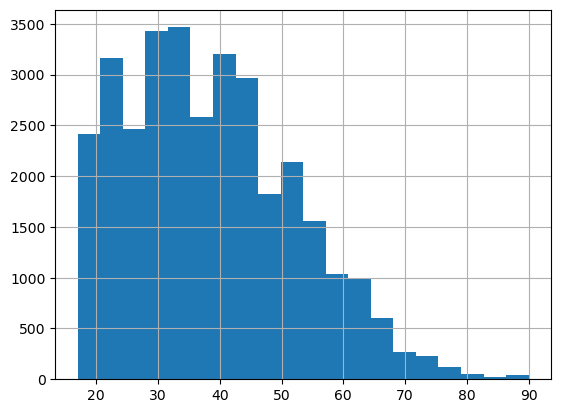

In [12]:
# Plotting the histogram of age with bin size of 20
df['age'].hist(bins=20)
plt.show()

In [27]:
def strip_whitespace(s):
    if isinstance(s, str):
        return s.strip()
    return s

In [26]:
# Applying the function to strip whitespace from string columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].apply(strip_whitespace)

In [25]:
# Grouping by occupation and getting summary statistics of age
occupation_stats = df.groupby('occupation').age.describe()

# Finding the profession with the oldest workers on average
oldest_profession = occupation_stats['mean'].idxmax()

# Finding the profession with the largest share of workforce above the 75th percentile
largest_share_above_75 = occupation_stats['75%'].idxmax()

print(f"Oldest profession on average: {oldest_profession}")
print(f"Profession with largest share above 75th percentile: {largest_share_above_75}")

Oldest profession on average: Exec-managerial
Profession with largest share above 75th percentile: ?


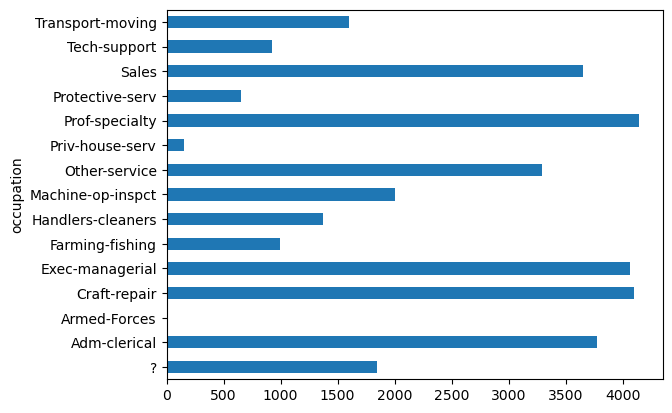

In [28]:
# Plotting the count of each occupation to detect outliers
occupation_stats['count'].plot(kind='barh')
plt.show()

# From the plot, we can see if any occupation group has very low representation.

In [29]:
# Creating two disjoint datasets by taking random samples from the full dataset
df1 = df.sample(5, random_state=1)
df2 = df.sample(5, random_state=2)

# Merging the two datasets on the 'occupation' column
merged_df = pd.merge(df1, df2, on='occupation', suffixes=('_df1', '_df2'))

# Showing the merged dataframe
merged_df

,age_df1,workclass_df1,fnlwgt_df1,education_df1,education-num_df1,marital-status_df1,occupation,relationship_df1,sex_df1,capital-gain_df1,...,education_df2,education-num_df2,marital-status_df2,relationship_df2,sex_df2,capital-gain_df2,capital-loss_df2,hours-per-week_df2,native-country_df2,income_df2
0,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,Male,0,...,Some-college,10,Never-married,Not-in-family,Female,0,1408,40,United-States,<=50K


Section 2

In [30]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
# Read in the Boston housing data set from the local directory
file_path = "C:\\Users\\grays\\Downloads\\Boston_housing.csv"
boston_data = pd.read_csv(file_path)


In [32]:
# Check first 10 records
print("First 10 records:")
print(boston_data.head(10))


First 10 records:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   

In [33]:
# In total, how many records are there?
total_records = len(boston_data)
print("\nTotal records:", total_records)



Total records: 506


In [35]:
# Create a smaller DataFrame without 'CHAS', 'NOX', 'B', and 'LSTAT'
selected_columns = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'PRICE']
smaller_dataframe = boston_data[selected_columns]


In [36]:
# Check the last 7 records of the new DataFrame
print("\nLast 7 records of the new DataFrame:")
print(smaller_dataframe.tail(7))



Last 7 records of the new DataFrame:
        CRIM   ZN  INDUS     RM   AGE     DIS  RAD  TAX  PTRATIO  PRICE
499  0.17783  0.0   9.69  5.569  73.5  2.3999    6  391     19.2   17.5
500  0.22438  0.0   9.69  6.027  79.7  2.4982    6  391     19.2   16.8
501  0.06263  0.0  11.93  6.593  69.1  2.4786    1  273     21.0   22.4
502  0.04527  0.0  11.93  6.120  76.7  2.2875    1  273     21.0   20.6
503  0.06076  0.0  11.93  6.976  91.0  2.1675    1  273     21.0   23.9
504  0.10959  0.0  11.93  6.794  89.3  2.3889    1  273     21.0   22.0
505  0.04741  0.0  11.93  6.030  80.8  2.5050    1  273     21.0   11.9


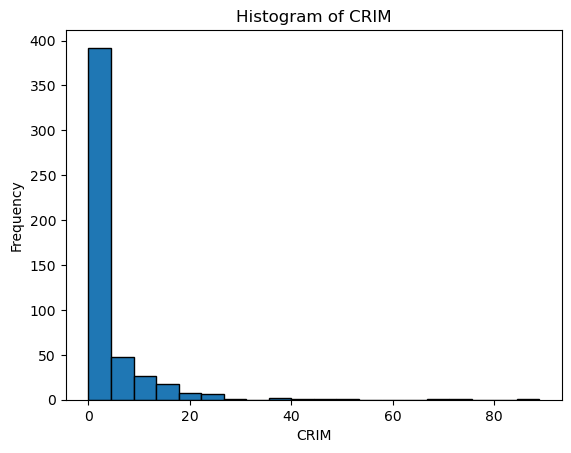

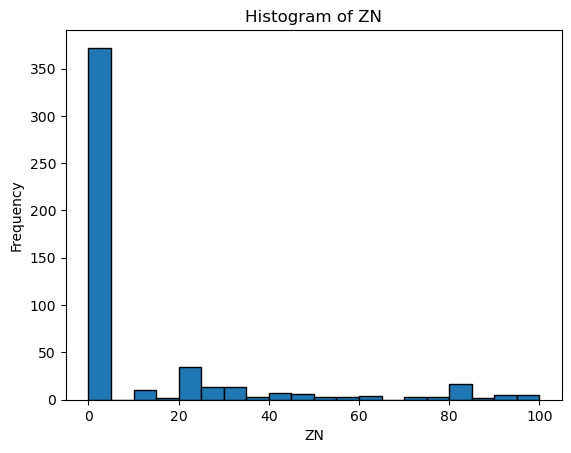

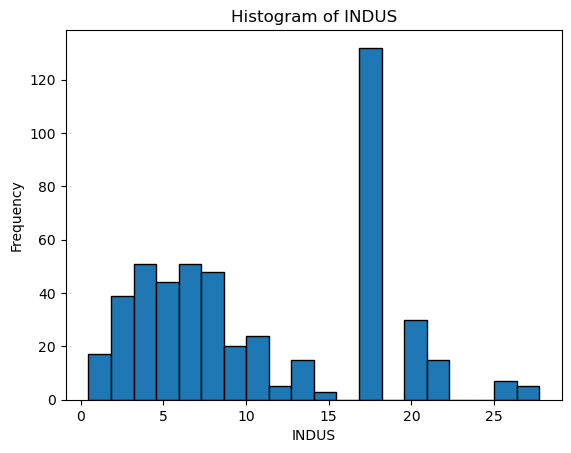

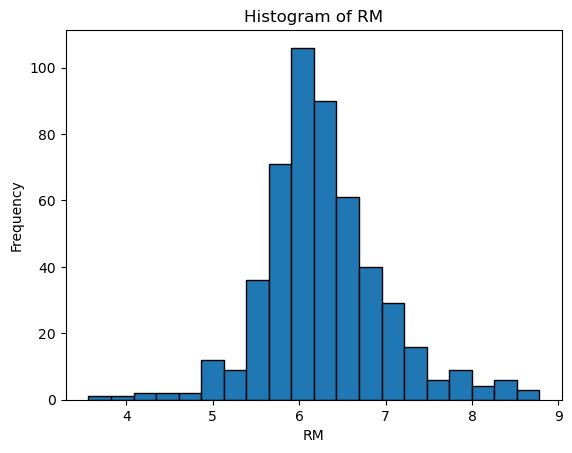

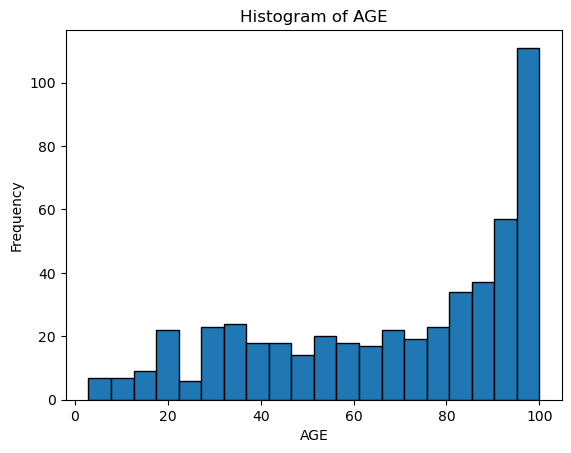

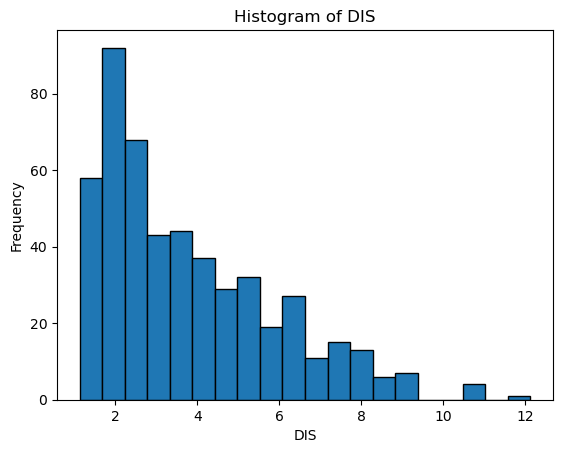

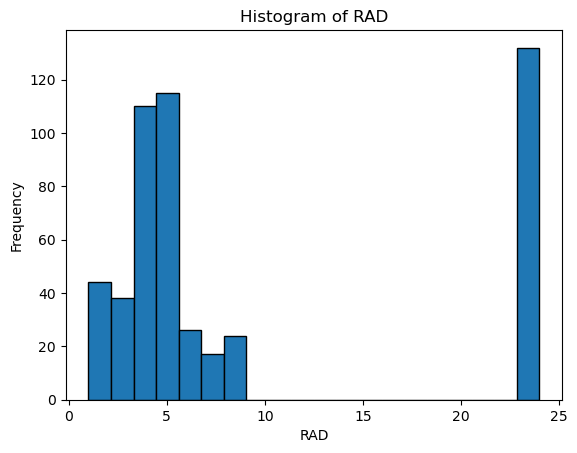

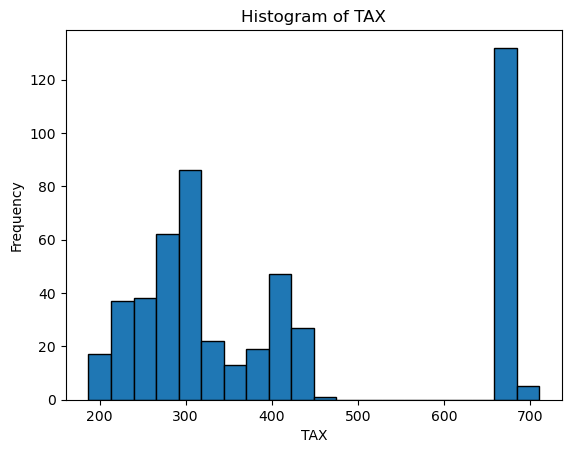

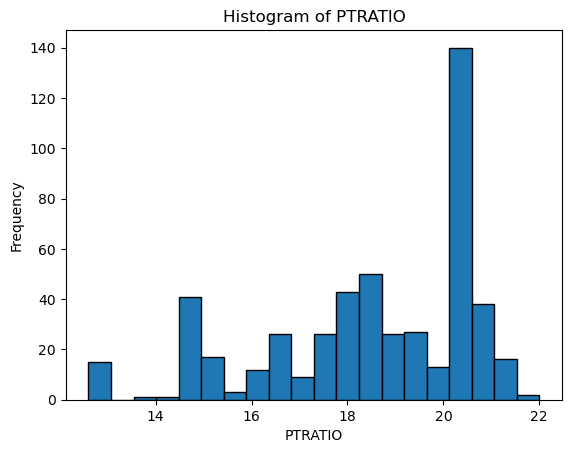

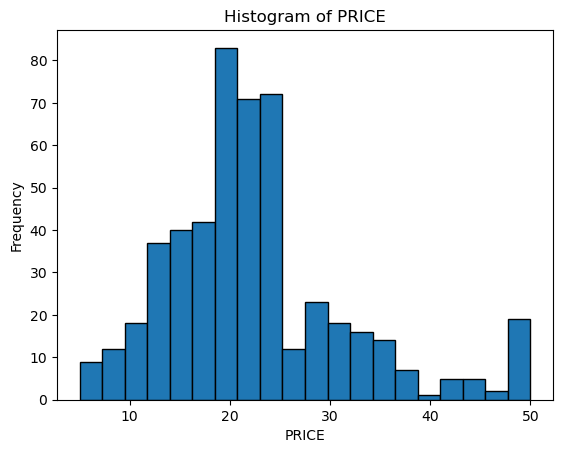

In [37]:
# Plot histograms of all variables in the new DataFrame
for column in smaller_dataframe.columns:
    plt.hist(smaller_dataframe[column], bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


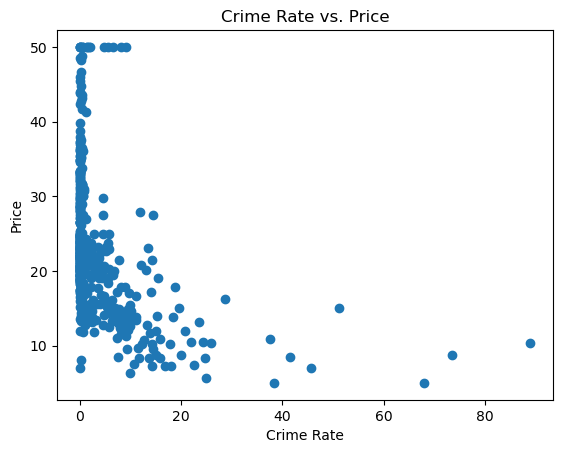

In [38]:
# Scatter plot of crime rate vs. Price
plt.scatter(boston_data['CRIM'], boston_data['PRICE'])
plt.title('Crime Rate vs. Price')
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()


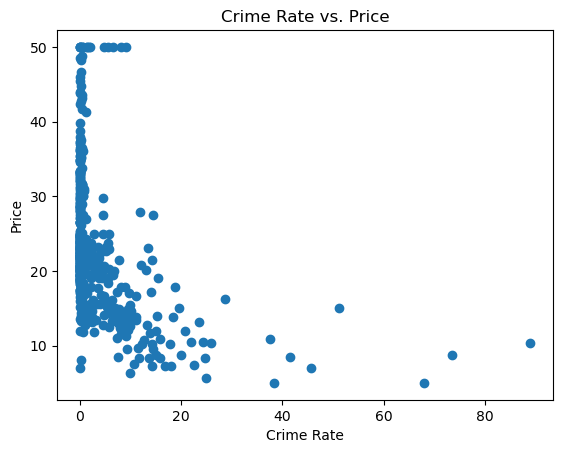

In [39]:
# Scatter plot of crime rate vs. Price
plt.scatter(boston_data['CRIM'], boston_data['PRICE'])
plt.title('Crime Rate vs. Price')
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()


In [40]:
# Calculate the mean rooms per dwelling
mean_rooms = boston_data['RM'].mean()
print("\nMean rooms per dwelling:", mean_rooms)



Mean rooms per dwelling: 6.284634387351779


In [41]:
# Calculate median Age
median_age = boston_data['AGE'].median()
print("\nMedian Age:", median_age)



Median Age: 77.5


In [42]:
# Calculate average (mean) distances to five Boston employment centres
mean_distance = boston_data['DIS'].mean()
print("\nAverage distance to employment centres:", mean_distance)



Average distance to employment centres: 3.795042687747036


In [43]:
# Calculate average (mean) distances to five Boston employment centres
mean_distance = boston_data['DIS'].mean()
print("\nAverage distance to employment centres:", mean_distance)



Average distance to employment centres: 3.795042687747036


Section 3

In [44]:
import pandas as pd

# Series 1
data_series1 = [7.3, -2.5, 3.4, 1.5]
index_series1 = ['a', 'c', 'd', 'e']
series1 = pd.Series(data_series1, index=index_series1)

# Series 2
data_series2 = [-2.1, 3.6, -1.5, 4, 3.1]
index_series2 = ['a', 'c', 'e', 'f', 'g']
series2 = pd.Series(data_series2, index=index_series2)

# Add Series 1 and Series 2
result_add = series1.add(series2, fill_value=0)

# Subtract Series 1 from Series 2
result_subtract = series2.sub(series1, fill_value=0)

# Print the results
print("Result Add:")
print(result_add)

print("\nResult Subtract:")
print(result_subtract)


Result Add:
a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

Result Subtract:
a   -9.4
c    6.1
d   -3.4
e   -3.0
f    4.0
g    3.1
dtype: float64
